# Goal: building a ML model for text classification

# Steps:
Step 1 - Loading the required libraries and modules.

Step 2 - Loading the data and performing basic data checks.

Step 3 - Pre-processing the raw text and getting it ready for machine learning.

Step 4 - Sampling with boostrap, Creating the Training and Test datasets.

Step 5 - Converting text to word frequency vectors with TfidfVectorizer.

Step 6 - Create and fit the different SML classifiers.

Step 7 - Computing the clssifier evaluation metrics.

step8 - Predict the class of new/unseen text i.e Abstracts

In [112]:
import os
os.getcwd()

'/Users/malli.gelli/Desktop/Git_Repo/AutoLitSurvey/notebooks'

## Step 1 - Loading the required libraries and modules

In [113]:
#Import numerical libraries
import numpy as np
from numpy import array
import pandas as pd

#Import graphical plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import resampling and modeling algorithms
from sklearn.utils import resample # for Bootstrap sampling
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#KFold CV
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')


## Step 2 - Loading the data and performing basic data checks

In [114]:
# Researchers experiment data
df= pd.read_excel ('/Users/malli.gelli/Desktop/Git_Repo/AutoLitSurvey/Input1_.xlsx')

# rename colums and print head
df.rename(columns={'Title ': 'Title', 'rank of relevance (1=high, 2=medium, 3=low)':'Class'}, inplace=True)
df.head()

,Functional area,Literature Subject name,Key words,date of search,Search engine/depository for search,Search_link,Title,Abstract,Link,"rank from search (1=first, 20=last)",Class,Rank
0,Biochemical pathways,Sesquiterpenes,"sesquiterpenes, C15, volatile isoprenoids, pla...",2022-04-11,Google Scholar,https://scholar.google.com/scholar?hl=en&as_sd...,Metabolic engineering of volatile isoprenoids ...,The chemical properties and diversity of volat...,https://onlinelibrary.wiley.com/doi/pdf/10.111...,1.0,1.0,high
1,NaN,NaN,NaN,NaT,NaN,NaN,Redirection of cytosolic or plastidic isopreno...,Terpenes constitute a distinct class of natura...,https://www.researchgate.net/profile/Anthony-C...,4.0,1.0,high
2,NaN,NaN,NaN,NaT,NaN,NaN,Genome organization in Arabidopsis thaliana: a...,The isoprenoid biosynthetic pathway provides i...,https://www.researchgate.net/profile/Majid-Gha...,6.0,1.0,high
3,NaN,NaN,NaN,NaT,NaN,NaN,My way: noncanonical biosynthesis pathways for...,Plant volatiles are crucial for various intera...,https://www.sciencedirect.com/science/article/...,7.0,1.0,high
4,NaN,NaN,NaN,NaT,NaN,NaN,Plant volatile terpenoid metabolism: biosynthe...,Volatile terpenoids released from different pl...,https://www.sciencedirect.com/science/article/...,8.0,1.0,high


In [115]:
df=df[['Title','Abstract','Class','Rank']]
df

,Title,Abstract,Class,Rank
0,Metabolic engineering of volatile isoprenoids ...,The chemical properties and diversity of volat...,1.0,high
1,Redirection of cytosolic or plastidic isopreno...,Terpenes constitute a distinct class of natura...,1.0,high
2,Genome organization in Arabidopsis thaliana: a...,The isoprenoid biosynthetic pathway provides i...,1.0,high
3,My way: noncanonical biosynthesis pathways for...,Plant volatiles are crucial for various intera...,1.0,high
4,Plant volatile terpenoid metabolism: biosynthe...,Volatile terpenoids released from different pl...,1.0,high
5,"Biochemistry of terpenoids: monoterpenes, sesq...",Terpenoids represent the largest class of seco...,1.0,high
6,Multi-substrate terpene synthases: their occur...,Terpene synthases are responsible for synthesi...,1.0,high
7,"Biosynthesis and emission of isoprene, methylb...",NaN,1.0,high
8,Biosynthesis of the sesquiterpene germacrene D...,The biogenetic origin of the isoprenoid buildi...,1.0,high
9,The nonmevalonate pathway supports both monote...,"Terpenoids, the largest class of plant seconda...",2.0,medium


In [116]:
# drop rows with no abstract, Class
df= df[df['Abstract'].notna()]
df=df[df['Class'].notna()]
df

,Title,Abstract,Class,Rank
0,Metabolic engineering of volatile isoprenoids ...,The chemical properties and diversity of volat...,1.0,high
1,Redirection of cytosolic or plastidic isopreno...,Terpenes constitute a distinct class of natura...,1.0,high
2,Genome organization in Arabidopsis thaliana: a...,The isoprenoid biosynthetic pathway provides i...,1.0,high
3,My way: noncanonical biosynthesis pathways for...,Plant volatiles are crucial for various intera...,1.0,high
4,Plant volatile terpenoid metabolism: biosynthe...,Volatile terpenoids released from different pl...,1.0,high
5,"Biochemistry of terpenoids: monoterpenes, sesq...",Terpenoids represent the largest class of seco...,1.0,high
6,Multi-substrate terpene synthases: their occur...,Terpene synthases are responsible for synthesi...,1.0,high
8,Biosynthesis of the sesquiterpene germacrene D...,The biogenetic origin of the isoprenoid buildi...,1.0,high
9,The nonmevalonate pathway supports both monote...,"Terpenoids, the largest class of plant seconda...",2.0,medium
10,Both methylerythritol phosphate and mevalonate...,"In higher plants, both the methylerythritol ph...",2.0,medium


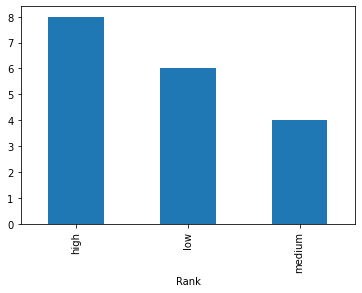

In [117]:
df.groupby('Rank').Abstract.count().plot.bar(ylim=0)
plt.show()

## Step 3 – Pre-processing the Raw Text (transform unstructured data to a matrix of numbers) and Getting It Ready for Machine Learning

The common pre-processing steps are:
1. Removing punctuation, stopwords, conversion to lower case, tokenization, stemming, lemmatization, part of speech tagging
2. Convert words to vectors (CountVectorizer, TF-IDF, ngrams, Word2ven, AvgWord2vec)

In [118]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/malli.gelli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## stemming abstracts

In [119]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer1 = PorterStemmer()
words = stopwords.words("english")

df['stem_text'] = df['Abstract'].apply(
    lambda x: " ".join([stemmer1.stem(i) 
                        for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [120]:
df['stem_text'].head()

0    the chemic properti divers volatil isoprenoid ...
1    terpen constitut distinct class natur product ...
2    the isoprenoid biosynthet pathway provid inter...
3    plant volatil crucial variou interact organ su...
4    volatil terpenoid releas differ plant part pla...
Name: stem_text, dtype: object

## lemmatize abstracts

In [121]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

df['lemma_text'] = df['Abstract'].apply(
    lambda x: " ".join([lemmatizer.lemmatize(i) 
                        for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [122]:
df['lemma_text'].head()

0    the chemical property diversity volatile isopr...
1    terpenes constitute distinct class natural pro...
2    the isoprenoid biosynthetic pathway provides i...
3    plant volatile crucial various interaction org...
4    volatile terpenoids released different plant p...
Name: lemma_text, dtype: object

## Slice feature and target variables, convert to arrays

In [123]:
data=df[['lemma_text','Rank']]
data.head()

,lemma_text,Rank
0,the chemical property diversity volatile isopr...,high
1,terpenes constitute distinct class natural pro...,high
2,the isoprenoid biosynthetic pathway provides i...,high
3,plant volatile crucial various interaction org...,high
4,volatile terpenoids released different plant p...,high


In [124]:
X= data['lemma_text'].values
y = data['Rank'].values

## Train test split data

In [125]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)
#print(X_train)
print('y_train group Ranks:\n', y_train)
print('--------')
print('y_test group Ranks:\n',y_test)

y_train group Ranks:
 ['low' 'low' 'medium' 'high' 'medium' 'low' 'high' 'low' 'high' 'medium'
 'low' 'high']
--------
y_test group Ranks:
 ['high' 'high' 'medium' 'high' 'high' 'low']


## Transform words into vectors with TF-IDF vectorizer

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tf = vectorizer_tfidf.fit_transform(X_train.ravel())
X_train_tf = vectorizer_tfidf.transform(X_train.ravel())
#print(vectorizer_tfidf.get_feature_names()[:10])  
#print('n_samples: %d, n_features: %d' % train_tfIdf.shape)
    
#transforming test data into tf-idf matrix
X_test_tf = vectorizer_tfidf.transform(X_test.ravel())
#print("n_samples: %d, n_features: %d" % X_test_tf.shape)

# Supervised Machine Learning Classification models

## Naive Bayes Classifier:
   Training set accuracy: 1.0,
   
   Test set accuracy: 0.167 

In [127]:
# naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
    
NB = MultinomialNB()
NB.fit(X_train_tf, y_train)
    
#predicted train data
y_pred_train_NB = NB.predict(X_train_tf)
print('Ranks of y_train\n:', y_train)
print('-----------------------------------')
print('NB classifier Training set predictions:\n',y_pred_train_NB)
print('Training set accuracy:', accuracy_score(y_train, y_pred_train_NB))

Ranks of y_train
: ['low' 'low' 'medium' 'high' 'medium' 'low' 'high' 'low' 'high' 'medium'
 'low' 'high']
-----------------------------------
NB classifier Training set predictions:
 ['low' 'low' 'medium' 'high' 'medium' 'low' 'high' 'low' 'high' 'medium'
 'low' 'high']
Training set accuracy: 1.0


In [128]:
y_pred_test_NB = NB.predict(X_test_tf)
print('Ranks of y_test\n:', y_test)
print('-----------------------------------')
print('NB classifier Test set predictions:\n',y_pred_test_NB)
naive_score = accuracy_score(y_test, y_pred_test_NB)
print('Test set accuracy:', np.round(naive_score,3))

Ranks of y_test
: ['high' 'high' 'medium' 'high' 'high' 'low']
-----------------------------------
NB classifier Test set predictions:
 ['low' 'low' 'low' 'low' 'low' 'low']
Test set accuracy: 0.167


In [129]:
print(metrics.classification_report(y_test, y_pred_test_NB, target_names=['high', 'medium','low']))
    
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_test_NB))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
      medium       0.17      1.00      0.29         1
         low       0.00      0.00      0.00         1

    accuracy                           0.17         6
   macro avg       0.06      0.33      0.10         6
weighted avg       0.03      0.17      0.05         6

Confusion matrix:
[[0 4 0]
 [0 1 0]
 [0 1 0]]


## Logistic Regression

Training set accuracy: 1.0,
   
Test set accuracy: 0.167 

In [130]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_tf, y_train)


#predicted train data
y_pred_train_LR = LR.predict(X_train_tf)
print('Ranks of y_train\n:', y_train)
print('-----------------------------------')
print('LR classifier Training set predictions:\n',y_pred_train_LR)
print('Training set accuracy:', accuracy_score(y_train, y_pred_train_LR))    

Ranks of y_train
: ['low' 'low' 'medium' 'high' 'medium' 'low' 'high' 'low' 'high' 'medium'
 'low' 'high']
-----------------------------------
LR classifier Training set predictions:
 ['low' 'low' 'medium' 'high' 'medium' 'low' 'high' 'low' 'high' 'medium'
 'low' 'high']
Training set accuracy: 1.0


In [131]:
y_pred_test_LR = LR.predict(X_test_tf)
print('Ranks of y_test\n:', y_test)
print('-----------------------------------')
print('LR classifier Test set predictions:\n',y_pred_test_LR)
LR_score = accuracy_score(y_test, y_pred_test_LR)
print('Test set accuracy:', np.round(LR_score,3))

Ranks of y_test
: ['high' 'high' 'medium' 'high' 'high' 'low']
-----------------------------------
LR classifier Test set predictions:
 ['low' 'low' 'low' 'low' 'low' 'low']
Test set accuracy: 0.167


## Decision tree classifier

Training set accuracy: 1.0,
   
Test set accuracy: 0.5

In [132]:
DT= DecisionTreeClassifier()
DT.fit(X_train_tf, y_train) 
    
#predicted train data
y_pred_train_DT = DT.predict(X_train_tf)
print('Ranks of y_train\n:', y_train)
print('-----------------------------------')
print('DT classifier Training set predictions:\n',y_pred_train_DT)
print('Training set accuracy:', accuracy_score(y_train, y_pred_train_DT))   

Ranks of y_train
: ['low' 'low' 'medium' 'high' 'medium' 'low' 'high' 'low' 'high' 'medium'
 'low' 'high']
-----------------------------------
DT classifier Training set predictions:
 ['low' 'low' 'medium' 'high' 'medium' 'low' 'high' 'low' 'high' 'medium'
 'low' 'high']
Training set accuracy: 1.0


In [133]:
y_pred_test_DT = DT.predict(X_test_tf)
print('Ranks of y_test\n:', y_test)
print('-----------------------------------')
print('DT classifier Test set predictions:\n',y_pred_test_DT)
DT_score = accuracy_score(y_test, y_pred_test_DT)
print('Test set accuracy:', np.round(DT_score,3))

Ranks of y_test
: ['high' 'high' 'medium' 'high' 'high' 'low']
-----------------------------------
DT classifier Test set predictions:
 ['high' 'low' 'low' 'low' 'high' 'low']
Test set accuracy: 0.5


## SGDclassifier

Training set accuracy: 1.0,
   
Test set accuracy: 0.5

In [134]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(random_state=123)
SGD_clf_scores = cross_val_score(SGD, X_train_tf, y_train, cv=3)
print('SGD cross val scores:', SGD_clf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (SGD_clf_scores.mean(), SGD_clf_scores.std() * 2))

SGD cross val scores: [0.   0.5  0.25]
Accuracy: 0.25 (+/- 0.41)


In [135]:
SGD.fit(X_train_tf, y_train)

#predicted train data
y_pred_train_SGD = SGD.predict(X_train_tf)
print('Ranks of y_train\n:', y_train)
print('-----------------------------------')
print('SGD classifier Training set predictions:\n', y_pred_train_SGD)
print('SGD training set accuracy:', accuracy_score(y_train, y_pred_train_SGD))

Ranks of y_train
: ['low' 'low' 'medium' 'high' 'medium' 'low' 'high' 'low' 'high' 'medium'
 'low' 'high']
-----------------------------------
SGD classifier Training set predictions:
 ['low' 'low' 'medium' 'high' 'medium' 'low' 'high' 'low' 'high' 'medium'
 'low' 'high']
SGD training set accuracy: 1.0


In [136]:
y_pred_test_SGD = SGD.predict(X_test_tf)
print('Ranks of y_test\n:', y_test)
print('-----------------------------------')
print('SGD classifier Test set predictions:\n',y_pred_test_SGD)
SGD_score = accuracy_score(y_test, y_pred_test_SGD)
print('SGD Test set accuracy:', np.round(SGD_score,3))

Ranks of y_test
: ['high' 'high' 'medium' 'high' 'high' 'low']
-----------------------------------
SGD classifier Test set predictions:
 ['low' 'low' 'medium' 'low' 'high' 'low']
SGD Test set accuracy: 0.5


## RandomForestClassifier

Training set accuracy: 1.0,
   
Test set accuracy: 0.167

In [137]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train_tf, y_train)

#predicted train data
y_pred_train_RF = RF.predict(X_train_tf)
print('Ranks of y_train\n:', y_train)

print('RF classifier Training set predictions:\n',y_pred_train_RF)
print('RF training set accuracy:', accuracy_score(y_train, y_pred_train_RF))
print('-----------------------------------')

y_pred_test_RF = RF.predict(X_test_tf)
print('Ranks of y_test\n:', y_test)
print('RF classifier Test set predictions:\n', y_pred_test_RF)
RF_score = accuracy_score(y_test, y_pred_test_RF)
print('RF Test set accuracy:', np.round(RF_score,3))
print('-----------------------------------')

Ranks of y_train
: ['low' 'low' 'medium' 'high' 'medium' 'low' 'high' 'low' 'high' 'medium'
 'low' 'high']
RF classifier Training set predictions:
 ['low' 'low' 'medium' 'high' 'medium' 'low' 'high' 'low' 'high' 'medium'
 'low' 'high']
RF training set accuracy: 1.0
-----------------------------------
Ranks of y_test
: ['high' 'high' 'medium' 'high' 'high' 'low']
RF classifier Test set predictions:
 ['low' 'low' 'low' 'low' 'low' 'low']
RF Test set accuracy: 0.167
-----------------------------------


# Doing a Test Prediction on Abstract Classifier Using TF-IDF

In [138]:
#doing a test prediction
test = ['The chemical properties and diversity of volatile isoprenoids lends them to a broad variety of biological roles. It also lends them to a host of biotechnological applications, both by taking advantage of their natural functions and by using them as industrial chemicals/chemical feedstocks. Natural functions include roles as insect attractants and repellents, abiotic stress protectants in pathogen defense, etc. Industrial applications include use as pharmaceuticals, flavours, fragrances, fuels, fuel additives, etc. Here we will examine the ways in which researchers have so far found to exploit volatile isoprenoids using biotechnology. Production and/or modification of volatiles using metabolic engineering in both plants and microorganisms are reviewed, including engineering through both mevalonate and methylerythritol diphosphate pathways. Recent advances are illustrated using several case studies (herbivores and bodyguards, isoprene, and monoterpene production in microbes). Systems and synthetic biology tools with particular utility for metabolic engineering are also reviewed. Finally, we discuss the practical realities of various applications in modern biotechnology, explore possible future applications, and examine the challenges of moving these technologies forward so that they can deliver tangible benefits. While this review focuses on volatile isoprenoids, many of the engineering approaches described here are also applicable to non-isoprenoid volatiles and to non-volatile isoprenoids.']
print(test)

['The chemical properties and diversity of volatile isoprenoids lends them to a broad variety of biological roles. It also lends them to a host of biotechnological applications, both by taking advantage of their natural functions and by using them as industrial chemicals/chemical feedstocks. Natural functions include roles as insect attractants and repellents, abiotic stress protectants in pathogen defense, etc. Industrial applications include use as pharmaceuticals, flavours, fragrances, fuels, fuel additives, etc. Here we will examine the ways in which researchers have so far found to exploit volatile isoprenoids using biotechnology. Production and/or modification of volatiles using metabolic engineering in both plants and microorganisms are reviewed, including engineering through both mevalonate and methylerythritol diphosphate pathways. Recent advances are illustrated using several case studies (herbivores and bodyguards, isoprene, and monoterpene production in microbes). Systems a

### Next up is text pre-processing (lemmatization)

In [139]:
review = re.sub('[^a-zA-Z]', ' ', test[0])
review = review.lower()
review = review.split()
review = [lemmatizer.lemmatize(i) for i in review if not i in set(words)]
test_processed =[ ' '.join(review)]

In [140]:
test_processed

['chemical property diversity volatile isoprenoids lends broad variety biological role also lends host biotechnological application taking advantage natural function using industrial chemical chemical feedstock natural function include role insect attractants repellent abiotic stress protectants pathogen defense etc industrial application include use pharmaceutical flavour fragrance fuel fuel additive etc examine way researcher far found exploit volatile isoprenoids using biotechnology production modification volatile using metabolic engineering plant microorganism reviewed including engineering mevalonate methylerythritol diphosphate pathway recent advance illustrated using several case study herbivore bodyguard isoprene monoterpene production microbe system synthetic biology tool particular utility metabolic engineering also reviewed finally discus practical reality various application modern biotechnology explore possible future application examine challenge moving technology forwar

In [141]:
test_input = vectorizer_tfidf.transform(test_processed)
test_input.shape

(1, 571)

In [142]:
res=NB.predict(test_input)
print('NB Abstract prediction:', res)
res=LR.predict(test_input)
print('LR Abstract prediction:', res)
res=DT.predict(test_input)
print('DT Abstract prediction:',res)
res=SGD.predict(test_input)
print('SGD Abstract prediction:',res)

NB Abstract prediction: ['low']
LR Abstract prediction: ['low']
DT Abstract prediction: ['high']
SGD Abstract prediction: ['low']


# Step8 - Predict class of some new abstracts

In [238]:
# new_dataset = pd.ExcelFile('/Users/malli.gelli/Desktop/Git_Repo/AutoLitSurvey/Input1_.xlsx')

# check what sheets in excel file
#sheets= print(new_data.sheet_names)

#new_set = pd.read_excel(new_dataset, 'New_Abstracts')

new_set=pd.read_csv('/Users/malli.gelli/Desktop/Git_Repo/AutoLitSurvey/notebooks/50_Abstracts_input.csv')

In [239]:
new_set.shape

(49, 2)

In [240]:
new_data= new_set[['Title','Abstract']]
new_data.head()

,Title,Abstract
0,Metabolic engineering of volatile isoprenoids ...,The chemical properties and diversity of volat...
1,The nonmevalonate pathway supports both monote...,"Terpenoids, the largest class of plant seconda..."
2,A unified mechanism of action for volatile iso...,The sessile nature of plants has resulted in t...
3,Redirection of cytosolic or plastidic isopreno...,Terpenes constitute a distinct class of natura...
4,Volatile isoprenoids and their importance for ...,"Among plant secondary metabolites, volatile is..."


In [241]:
new_data['lemma_text'] = new_data['Abstract'].apply(
    lambda x: " ".join([lemmatizer.lemmatize(i) 
                        for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [242]:
data_set=list(new_data['lemma_text'])
print(data_set[:2])

['the chemical property diversity volatile isoprenoids lends broad variety biological role it also lends host biotechnological application taking advantage natural function using industrial chemical chemical feedstock natural function include role insect attractants repellent abiotic stress protectants pathogen defense etc industrial application include use pharmaceutical flavour fragrance fuel fuel additive etc here examine way researcher far found exploit volatile isoprenoids using biotechnology production modification volatile using metabolic engineering plant microorganism reviewed including engineering mevalonate methylerythritol diphosphate pathway recent advance illustrated using several case study herbivore bodyguard isoprene monoterpene production microbe systems synthetic biology tool particular utility metabolic engineering also reviewed finally discus practical reality various application modern biotechnology explore possible future application examine challenge moving tech

In [243]:
test_input = vectorizer_tfidf.transform(data_set)
test_input.shape

(49, 571)

In [244]:
SGD_rank =[]
for i in test_input:
   #print(i)
   res=SGD.predict(i)
   #print(res)          
   if res=='high':
       SGD_rank.append("high")
   elif res=='medium':
       SGD_rank.append("medium")
   else:
       SGD_rank.append("low")  

In [245]:
SGD_labels=pd.DataFrame({'Labels': SGD_rank})
SGD_labels.value_counts()

Labels
low       23
high      17
medium     9
dtype: int64

In [246]:
Abstracts_class=pd.concat([new_data1[['Title', 'Abstract']], SGD_labels], axis=1)
Abstracts_class.head()

,Title,Abstract,Labels
0,Metabolic engineering of volatile isoprenoids ...,The chemical properties and diversity of volat...,low
1,The nonmevalonate pathway supports both monote...,"Terpenoids, the largest class of plant seconda...",medium
2,A unified mechanism of action for volatile iso...,The sessile nature of plants has resulted in t...,low
3,Redirection of cytosolic or plastidic isopreno...,Terpenes constitute a distinct class of natura...,low
4,Volatile isoprenoids and their importance for ...,"Among plant secondary metabolites, volatile is...",low


In [247]:
Abstracts_class['NLP_predicted_rank (1=high, 2=medium, 3=low)']= Abstracts_class['Labels'].map({'high':1, 'medium':2, 'low':3})


In [248]:
Abstracts_class.head()

,Title,Abstract,Labels,"NLP_predicted_rank (1=high, 2=medium, 3=low)"
0,Metabolic engineering of volatile isoprenoids ...,The chemical properties and diversity of volat...,low,3.0
1,The nonmevalonate pathway supports both monote...,"Terpenoids, the largest class of plant seconda...",medium,2.0
2,A unified mechanism of action for volatile iso...,The sessile nature of plants has resulted in t...,low,3.0
3,Redirection of cytosolic or plastidic isopreno...,Terpenes constitute a distinct class of natura...,low,3.0
4,Volatile isoprenoids and their importance for ...,"Among plant secondary metabolites, volatile is...",low,3.0


In [250]:
Abstracts_class.to_excel('/Users/malli.gelli/Desktop/Git_Repo/AutoLitSurvey/Output_NLP_Predicted_50_Abstracts_class.xlsx')

In [8]:
password_key = '1%Anji0247'

# Step8: Access input from SQL table to make predictions

In [10]:
import pyodbc
import pandas as pd
server = 'literaturemining.database.windows.net' 
database = 'adb-lm-01' 
username = 'malli.gelli@calyxt.com' 
password = password_key 
cnxn = pyodbc.connect('DRIVER={libmsodbcsql.18.dylib};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
query = "SELECT Title, Abstract FROM [stg].[TitleAbstract]"
df = pd.read_sql(query, cnxn)
print(df.head(26))

Error: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib 'libmsodbcsql.18.dylib' : file not found (0) (SQLDriverConnect)")

In [9]:
import pandas as pd
import pymssql

con = pymssql.connect(
    server = 'literaturemining.database.windows.net', 
    database = 'adb-lm-01',
    username = 'malli.gelli@calyxt.com',
    password = password_key)
cursor = con.cursor()

query = "SELECT * FROM [stg].[TitleAbstract]"
cursor.execute(query)
df = pd.read_sql(query, con)
con.close()

df

TypeError: connect() got an unexpected keyword argument 'username'

## Step8 - Predict the class of ALL new/unseen Abstracts from SQL database that Jeff created

In [157]:
import pandas as pd
new_data = pd.read_csv('/Users/malli.gelli/Desktop/Git_Repo/AutoLitSurvey/Sesquiterpenes_new-Abstracts.csv')
new_data.head()

,Title,Abstract
0,‘Hidden’ Terpenoids in Plants: Their Biosynthe...,Terpenoids are the largest group of plant spec...
1,A modern purification method for volatile sesq...,Most volatile sesquiterpenes had been purified...
2,A Novel Pathway for Sesquiterpene Biosynthesis...,"In the wild tomato Solanum habrochaites, the S..."
3,A Promiscuous CYP706A3 Reduces Terpene Volatil...,Flowers are essential but vulnerable plant org...
4,Antisense Suppression of a (+)-d-Cadinene Synt...,In cotton (Gossypium hirsutum) the enzyme (+)-...


## Filter Abstract column

In [158]:
# replace following words in Abstract column with space
new_data=new_data.apply(lambda x: x.replace({'View Full-Text':'', 'Publisher Summary': '', 'Abstract':'', 'ABSTRACT':'','Summary':''}, regex=True))
# remove extra spaces in Abstract column
new_data['Abstract'] = new_data['Abstract'].str.strip()
#new_data.head()

## text preprocessing

In [159]:
import re
new_data['lemma_text'] = new_data['Abstract'].apply(
    lambda x: " ".join([lemmatizer.lemmatize(i) 
                        for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [160]:
data_set=list(new_data['lemma_text'])
print(len(data_set))
print(data_set[:2])

578
['terpenoids largest group plant specialized secondary metabolite these naturally occurring chemical compound highly diverse chemical structure although many excellent study terpenoids focused compound built solely isoprene unit plants however also contain many atypical terpenoids glycosylated volatile terpene composite type terpenoids latter synthesized coupling isoprene unit aromatic compound this mini review describes hidden terpenoids providing overview biosynthesis localization biological ecological activity', 'most volatile sesquiterpenes purified plant using distillation preparative gas chromatography applicable many laboratory posse needed facility thus review focus modern purification method volatile sesquiterpenes using escherichia coli cell functionally express terpene synthase tps gene it recently developed recombinant e coli cell carrying tps gene cultured two layer medium n octane tb medium without harming cell volatile hydrophobic compound trapped n octane purified t

In [161]:
# tranform text to vectorizer
test_input = vectorizer_tfidf.transform(data_set)
test_input.shape

(578, 571)

## predict class of new abstracts with DecisionTree classifier}

In [162]:
 # create list of predicted labels
 DT_rank =[]
 for i in test_input:
    #print(i)
    res=DT.predict(i)
    #print(res)          
    if res=='high':
        DT_rank.append("high")
    elif res=='medium':
        DT_rank.append("medium")
    else:
        DT_rank.append("low")  

In [163]:
# convert list of labels to dataframe
DT_labels=pd.DataFrame({'DT_Labels': DT_rank})

In [164]:
# concatenate dataframes
Abstracts_class=pd.concat([new_data, DT_labels], axis=1)
Abstracts_class.head()

,Title,Abstract,lemma_text,DT_Labels
0,‘Hidden’ Terpenoids in Plants: Their Biosynthe...,Terpenoids are the largest group of plant spec...,terpenoids largest group plant specialized sec...,medium
1,A modern purification method for volatile sesq...,Most volatile sesquiterpenes had been purified...,most volatile sesquiterpenes purified plant us...,low
2,A Novel Pathway for Sesquiterpene Biosynthesis...,"In the wild tomato Solanum habrochaites, the S...",in wild tomato solanum habrochaites sst locus ...,low
3,A Promiscuous CYP706A3 Reduces Terpene Volatil...,Flowers are essential but vulnerable plant org...,flowers essential vulnerable plant organ expos...,low
4,Antisense Suppression of a (+)-d-Cadinene Synt...,In cotton (Gossypium hirsutum) the enzyme (+)-...,in cotton gossypium hirsutum enzyme cadinene s...,low


In [165]:
Abstracts_class = Abstracts_class.loc[:, ['Title','Abstract', 'DT_Labels']]
Abstracts_class

,Title,Abstract,DT_Labels
0,‘Hidden’ Terpenoids in Plants: Their Biosynthe...,Terpenoids are the largest group of plant spec...,medium
1,A modern purification method for volatile sesq...,Most volatile sesquiterpenes had been purified...,low
2,A Novel Pathway for Sesquiterpene Biosynthesis...,"In the wild tomato Solanum habrochaites, the S...",low
3,A Promiscuous CYP706A3 Reduces Terpene Volatil...,Flowers are essential but vulnerable plant org...,low
4,Antisense Suppression of a (+)-d-Cadinene Synt...,In cotton (Gossypium hirsutum) the enzyme (+)-...,low
...,...,...,...
573,Isoprenoids: Remarkable diversity of form and ...,The isoprenoid biosynthetic pathway is the sou...,medium
574,Lepidopteran herbivory and oral factors induce...,Terpenes are an important class of defense com...,low
575,Metabolic engineering of aroma components in f...,Plants have the ability to produce a diversity...,high
576,"Metabolic engineering of plant monoterpenes, s...",Terpenoids (a.k.a. isoprenoids) represent the ...,high


In [166]:
Abstracts_class['NLP_predicted_rank (1=high, 2=medium, 3=low)']= Abstracts_class['DT_Labels'].map({'high':1, 'medium':2, 'low':3})

In [167]:
# write resutls to 
Abstracts_class.to_excel('Outpot_set2_Abstracts_NLP_classification.xlsx')